# 02807: Project 2
 
## Practical information
 
* This project must be completed in groups of 3 students.
    * The group must be registered on the course site on DTU Learn: My Course > Groups
    * Groups must be registered anew (even if you already registered for Project 1)
* This project must be handed in as a jupyter notebook to the course site on DTU Learn. 
    * Go to the Course Content > Assignments tab to upload your submission. 
* This project is due on Monday, November 29, 20:00.

## Submission rules

* Each group has to hand in *one* notebook (`.ipynb`) with their solutions, including a filled out Contribution table (see below).
* Your solution must be written in Python.
* For each question you should use the cells provided ("`# your code goes here`" and "*your explanation here*") for your solution
    * It is allowed to add code cells within a question block, but consider if it's really necessary.
* You should not remove the problem statements, and you should not modify the structure of the notebook.
* Your notebook should be runnable and readable from top to bottom.
    * Meaning that your code cells work when run in order (from top to bottom).
    * Output of any cell depends only on itself and cells above it.
* Your notebook should be submitted after having been run from top to bottom.
    * This means outputs are interpretable without necessarily running your cells.
    * The simplest way to achieve this is using the jupyter menu item Kernel > Restart & Run All just prior to submission. If any cell fails when you do this, your notebook is not ready for submission.
    * Exercise 3 in particular will take time to finish, plan accordingly, that is, make sure you have time to run your notebook from top to bottom.
* Failure to comply may make it impossible for us to evaluate your submission properly, which will likely negatively impact the points awarded.

## Solution guidelines
* Data processing is via Spark for the first three exercises and pandas/SQL in the fourth exercise.
* Where naming of dataframes and functions are explicitly stated, these must be used.
* Your solutions will be evaluated by correctness, code quality and interpretability of the output. 
    * You have to write clean, readable and efficient Spark code that will generate sensible execution plans.
    * You have to write clean, readable and efficient SQL queries.
    * Your tables and visualisations should be meaningful and easy to read. This requires, but is not limited to, including headers, legends and well-written (brief) descriptions for graphs/charts. In this step you've found the data processing solution, so put also some effort into its presentation.

## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 150.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
    * Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
    * Several group members can take credit for the same solution if they all have contributed substantially to it.
* Each group member must contribute **at least 65 points**. 
    * If no name is provided for an exercise's part, **all group members** are considered contributors to it.
* Group members should decide amongst themselves how to collaborate on the project to meet these constraints.  
* Scores are individual. The score $\text{score}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{score}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$
  
  
* The following is an example of a contributions table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | John      |
| **Part 4** | Ann       |  Ann          |     John, Mary       | John       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |


* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4 which are all wrong. Then Ann's score is calculated as follows:

  * $\text{individual-score}(Ann) = \frac{5+5+10+5+5+15+15}{5+5+10+5+5+15+15+15+5} = \frac{60}{80} = 0.75$

  * $\text{group-score} = \frac{95}{150} = 0.633$

  * $\text{score}(Ann) = 7.5\cdot 0.75 + 2.5 \cdot 0.633 = 7.21$


# Group contribution table 

This table must be filled before submission.



In [1]:
import pandas as pd

d = {'Exercise 1' : ['', '', '', '', 'n.a'], 
     'Exercise 2' : ['', '', '', '', ''],
     'Exercise 3' : ['', '', '', '', 'n.a'],
     'Exercise 4' : ['', '', '', '', 'n.a'],
     } 
  
ct = pd.DataFrame(d, index=['Part 1', 'Part 2', 'Part 3', 'Part 4', 'Part 5']) 

ct

,Exercise 1,Exercise 2,Exercise 3,Exercise 4
Part 1,,,,
Part 2,,,,
Part 3,,,,
Part 4,,,,
Part 5,n.a,,n.a,n.a


# The AirBnB dataset

<img src="https://www.esquireme.com/public/images/2019/11/03/airbnb-678x381.jpg" alt="airbnb" width="400"/>

[Airbnb](http://airbnb.com) is an online marketplace for arranging or offering lodgings. In the first three exercises you will use Spark to analyze data obtained from the Airbnb website (stricly speaking via data scraped by [insideairbnb](http://insideairbnb.com/get-the-data.html)). The purpose of your analysis is to extract insights about listings as a whole, specifics about London, and sentiment analysis of reviews (word positivity).


## Loading data
The dataset consists of listings (offered lodgings) and reviews (submitted by users). The `.csv`'s you'll work with vary between the first three exercises, but is structured so that the function below will load it into a spark dataframe.

In [2]:
def load_csv_as_dataframe(path):
    return spark.read.option('header', True) \
                .option('inferSchema', True) \
                .option('multiLine', 'True') \
                .option('escape', '"') \
                .option('mode', 'DROPMALFORMED')\
                .csv(path)

## Imports and Spark session

* You'll need to adapt the `JAVA_HOME` environment variable to your setup. 
* You should set the `spark.driver.memory` value to the amount of memory on your machine. 
* It may be required for you to install some of the packages imported below (e.g. pandasql).

In [3]:
# Instructions on p. 20 Learning Spark, 2nd ed.
# Here's a quick-guide, googling may also be required
# 1) Install pyspark via conda/pip
#          pyspark requires the JAVA_HOME environment variable is set.
# 2) Install JDK 8 or 11, figure out the install location
#          Suggest to use https://adoptopenjdk.net/
# 3) Update the JAVA_HOME environment variable set programmatically below 
#    with your install location specifics

# JAVA_HOME environment variable is set programatically below
# but you must point it to your local install

import os
os.environ["JAVA_HOME"] = "C://Program Files//Eclipse Adoptium//jdk-11.0.13.8-hotspot"


# If you get "Job aborted due to stage failure" and 
# "Python worker failed to connect back." exceptions, 
# this should be solved by additionally setting these 
# environment variables

os.environ['PYSPARK_PYTHON'] = 'python'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'notebook'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark import SparkContext, SparkConf

from pandas_profiling import ProfileReport

import pandasql as psql

In [5]:
# Sets memory limit on driver and to use all CPU cores
conf = SparkConf().set('spark.ui.port', '4050') \
        .set('spark.driver.memory', '7g') \
        .setMaster('local[*]')

sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [6]:
spark

In [7]:
sc.getConf().getAll()

[('spark.app.id', 'local-1638099649482'),
 ('spark.sql.warehouse.dir',
  'file:/D:/Centrale_Lyon/DTU/S11/Computational%20tools%20for%20data%20science/Project%202/spark-warehouse'),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.driver.host', 'DESKTOP-0246G4J'),
 ('spark.ui.port', '4050'),
 ('spark.driver.port', '52700'),
 ('spark.app.startTime', '1638099647472'),
 ('spark.driver.memory', '7g'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

# Exercise 1: Listings and cities (20 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized).


## Part 1: Preparing the dataframe (5 pts)

Your data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/listings.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_listings`.

After the data is read, you should select the columns necessary for exercise 1, 2 and 3 (by reading ahead or iteratively extend this loading code). Name this dataframe `df_listings_analysis` and make use of caching.

Prices are in local currency, but are nonetheless prefixed with `$` and contains thousands separator commas. You will need to remove these characters and cast the price column to `pyspark.sql.types.DoubleType`. Observe that if this casting is not possible, the result of the cast is `null`.

In [8]:
df_listings = load_csv_as_dataframe('listings.csv')

In [9]:
df_listings_analysis = df_listings.select(F.col('city'),\
                                          F.col('neighbourhood_cleansed'),\
                                          F.col('property_type'), \
                                          F.col('review_scores_rating').alias('rating').cast(pyspark.sql.types.DoubleType()),
                                          F.regexp_replace(F.col('price'),"[\$,]","").alias('price').cast(pyspark.sql.types.DoubleType()),\
                                          F.col('id') \
                                         ).cache()

## Part 2: Listing and neighbourhood counts (5 pts)

Compute and visualise the number of listings and the number of different neighbourhoods per city, restricted to the 15 cities having the most listings. The x-axis should be ordered by number of listings (high to low).

Make sure to use the `neighbourhood_cleansed` column in your computations.


In [ ]:
# your code goes here

## Part 3: Price averages (5 pts)

Compute and visualise the average price of listings per city, restricted to the 15 cities having the most listings.

In [ ]:
# your code goes here

## Part 4: Value for money (5 pts)

The value of a listing is its rating divided by its price. The value of a city is the average value of its listings. 

Prices are only comparable when the local currency is the same. We'll therefore consider a subset of Euro-zone cities as defined in `eurozone_cities`.

Compute and visualise the value per city, restricted to the Euro-zone cities.

In [ ]:
eurozone_cities = [
    'Paris', 'Roma', 'Berlin', 'Madrid', 'Amsterdam', 'Barcelona', 'Milano', 'Lisboa',
    'München', 'Wien', 'Lyon', 'Firenze', 'Porto', 'Napoli', 'Bordeaux', 'Venezia',
    'Málaga', 'Sevilla', 'València'
]

In [ ]:
# your code goes here

# Exercise 2: The case of London (30 pts)

In this exercise you must use Spark to do the data processing. 
* For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. 
* For parts requiring visualisation, the `toPandas` call should be followed only by functions necessary to customize the plotting/layout steps (i.e. no data processing take place after your spark dataframe is materialized). 
* You may need multiple queries to solve the individual parts.

Your dataframe is a subset of `df_listings_analysis` and should be named `df_listings_london`.

In [ ]:
# your code goes here

## Part 1: Price distribution (5 pts)

Compute and visualise the distribution of prices, for all prices up to and including the 95-percentile. Additionally, compute and visualise the distribution of prices, for all prices above the 95-percentile.

In [ ]:
# your code goes here

## Part 2: Prices by type of property (5 pts)

Compute and visualise the average price and average rating per type of property, for property types with 75 or more listings. 

Your visualisation should be a single bar chart with two y-axes and two bars per property type. The x-axis should be ordered by average rating.

In [ ]:
# your code goes here

## Part 3: Best offering in the neighbourhood (10 pts)

The value of a listing is its rating divided by its price. Compute and display a dataframe (with the columns you selected in Exercise 1 and those computed in this part) with the 3 highest valued listings in each neighbourhood, and having a value above 5. Make sure to use the `neighbourhood_cleansed` column in your computations.

Computing ranks based on value can be achieved using `pyspark.sql.window.Window`. This may produce equal ranks (i.e. when the value of two listings are the same).

Remember to use `pd.set_option('display.max_rows', <n>)` with appropriate `<n>` so all rows are displayed.

In [ ]:
# your code goes here

## Part 4: Activity by month (5 pts)

Activity is given by the number of reviews received in a given time period. Compute and visualise the activity based on month, that is, the total number of reviews given in January, February, etc..

Your additional data source is [this zip archive](https://data-download.compute.dtu.dk/c02807/reviews_london.csv.zip) which you must uncompress and place in the same folder as this notebook. It is loaded in the next cell and named `df_reviews_london`.

In [10]:
df_reviews_london = load_csv_as_dataframe('reviews_london.csv')

In [ ]:
# your code goes here

## Part 5: Reviews per listing (5 pts)

Each London listing has received 0 or more reviews. 

Display a dataframe showing 1) The number of listings, 2) The average number of reviews a listing receives, 3) The standard deviation of the reviews per listing distribution, 4) The minimum number of reviews any listing has received, and 5) The maximum number of reviews any listing has received.

In [ ]:
# your code goes here

# Exercise 3: Word sentiment (45 pts)

In this exercise you must use Spark to do the data processing. For parts where you present tabular data, this entails calling `toPandas` as the final step of your query. You may need multiple queries to solve the individual parts.

The goal here is to determine what sentiment (positive or negative) words in reviews have. Roughly speaking, we want each word to be assigned a score based on the rating of the reviews in which the word occurs in the review comment. We'd expect words such as "clean", "comfortable", "superhost" to receive high scores, while words such as "unpleasant", "dirty", "disgusting" would receive low scores.

As individual reviews do not have a rating, we'll consider the rating of individual reviews to be the rating of its related listing (i.e. assuming each review gave the average rating (`review_scores_rating`) of the listing). 

The score of a word is given by the mean review rating over the reviews in which that word occurs in the comment. We require words to appear in at least 0.5% (1 in 200) listings, and to be at least 4 characters, for it to have a defined score.

Formally, when a word $w$ occurs in at least $0.5\%$ of listings and $|w| > 3$, its score is

$
\begin{align*}
score(w) = \frac{1}{|C_w|}\sum_{comment \in C_w} \text{review_rating}(comment)
\end{align*}
$
, where 
* $C_w = \{comment \mid w \text{ occurs in } \text{clean_text}(comment)\}$, the set (so no duplicates) of comments in which $w$ occurs, and
* $\text{clean_text}(comment)$ is the result of your `clean_text` function defined below, and
* $\text{review_rating}(comment)$ is the `review_scores_rating` of the listing which this $comment$ is related to.


## Part 1: Toy data (15 pts)

To get started we'll consider a toy example where the input is `df_sentiment_listings_toy` and `df_sentiment_reviews_toy` defined in the next code cell. You should provide an implementation of `calculate_word_scores_toy` in the subsequent code cell. Your implementation should result in a query that when given the toy example dataframes as input and is materialized with `toPandas()` produces this table:

|    | word   |   word_score |   listing_occurences |   word_occurences |   comment_occurences |
|---:|:-------|-------------:|---------------------:|------------------:|---------------------:|
|  0 | aaaa   |      7       |                    3 |                 5 |                    5 |
|  1 | bbbb   |      6.66667 |                    2 |                 3 |                    3 |
|  2 | eeee   |      0       |                    1 |                 1 |                    1 |
|  3 | dddd   |      5       |                    1 |                 1 |                    1 |
|  4 | cccc   |      5       |                    2 |                 2 |                    2 |'

Observe that `word_occurences` and `comment_occurences` are the same as words occuring multiple times in a comment are counted once, and that `clean_text` is used to ignore casing and discard non-words. Additionally, any word occuring at least once will occur in more than 1 out of 200 listings on this toy data.

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark import SparkContext, SparkConf


os.environ["JAVA_HOME"] = "C://Program Files//Eclipse Adoptium//jdk-11.0.13.8-hotspot"

os.environ['PYSPARK_PYTHON'] = 'python'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'notebook'


In [7]:
# create the Spark session
conf = SparkConf().set("spark.ui.port", "4050")
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

spark

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-5-d9aac55e526f>:6 

In [11]:
from pyspark.sql.types import StructType, StructField, StringType

schema_listings = StructType([
    StructField('id', StringType(), True),
    StructField('review_scores_rating', StringType(), True),
])
data_listings = [
    {'id': '0', 'review_scores_rating': '10'},
    {'id': '1', 'review_scores_rating': '5'},
    {'id': '2', 'review_scores_rating': '0'},
]
df_sentiment_listings_toy = spark.createDataFrame(data_listings, schema_listings)

schema_reviews = StructType([
    StructField('listing_id', StringType(), True),
    StructField('id', StringType(), True),
    StructField('comments', StringType(), True),
])
data_reviews = [
    {'listing_id': '0', 'id': '100', 'comments': 'aaaa bbbb          cccc'},
    {'listing_id': '0', 'id': '101', 'comments': 'aaaa bbbb '},
    {'listing_id': '0', 'id': '102', 'comments': 'aaaa aAAa          aaaa'},
    {'listing_id': '1', 'id': '103', 'comments': 'Aaaa bbb ccc'},
    {'listing_id': '1', 'id': '104', 'comments': 'dddd %ˆ&*'},
    {'listing_id': '2', 'id': '105', 'comments': 'AaaA'},
    {'listing_id': '2', 'id': '106', 'comments': 'bbbb ccc e&eˆˆee'},
    {'listing_id': '2', 'id': '107', 'comments': 'cccc cccc'},
]

df_sentiment_reviews_toy = \
    spark.createDataFrame(data_reviews, schema_reviews) \
        .select(F.col('listing_id'), F.col('id').alias('comment_id'), F.col('comments'))


In [12]:
df_sentiment_listings_toy.show()

+---+--------------------+
| id|review_scores_rating|
+---+--------------------+
|  0|                  10|
|  1|                   5|
|  2|                   0|
+---+--------------------+



In [13]:
df_sentiment_reviews_toy.show()

+----------+----------+--------------------+
|listing_id|comment_id|            comments|
+----------+----------+--------------------+
|         0|       100|aaaa bbbb        ...|
|         0|       101|          aaaa bbbb |
|         0|       102|aaaa aAAa        ...|
|         1|       103|        Aaaa bbb ccc|
|         1|       104|           dddd %ˆ&*|
|         2|       105|                AaaA|
|         2|       106|    bbbb ccc e&eˆˆee|
|         2|       107|           cccc cccc|
+----------+----------+--------------------+



In [79]:
from pyspark.sql.functions import udf,col
import re

# your code goes here
def clean_text(col):
    """
        Cleans the text (comment) associated with col. The
        cleaning should:
            1) col =
            2) Turn multiple whitespaces into single whitespaces
            3) Remove anything but letters, digits and whitespaces
        
        :col: A Spark Column object containing text data
        :returns: A Spark Column object.
    """
    #Lower
    col=col.lower()
    #remove multiple whitspaces
    col = re.sub('\s+', ' ', col)    
    #Remove anything but letters, digits and whitespaces
    col = re.sub('[^a-z\d\s]+', '', col)    
    return col

def calculate_word_scores_toy(df_list, df_rev):
    """
        Calculates the word score over listings in df_list and
        reviews in df_rev. The table produced should have the 
        same columns as specified in part 1.
        
        :returns: A pandas DataFrame
    """
    df_rev_clean=df_rev.withColumn("clean comments",udf_clean_text(col("comments")))
    df_rev_clean=df_rev_clean.select('*',F.explode(F.split(F.col('clean comments'), ' ')).alias('word'))
    df_rev_clean=df_rev_clean.select('word','listing_id','comment_id')
    #Filter on word
    df_rev_clean=df_rev_clean.filter(F.length('word')>3)
    #Create the filter for the listing
    filter_cond =df_list.dropDuplicates().count()
    #Join
    cond = [df_rev_clean.listing_id == df_list.id]

    df_joined = df_rev_clean.join(df_list,cond,how='left')
    #Drop duplicates
    df_joined= df_joined.dropDuplicates()
    df_joined=df_joined.groupby('word').agg(F.mean('review_scores_rating'),F.countDistinct('listing_id'),F.count('word'), F.countDistinct('comment_id'))\
                                       .withColumnRenamed("avg(review_scores_rating)","word_score")\
                                       .withColumnRenamed("count(listing_id)","listing_occurences")\
                                       .withColumnRenamed("count(word)","word_occurences")\
                                       .withColumnRenamed("count(comment_id)","comment_occurences")
    df_joined=df_joined.filter(F.col('listing_occurences')>filter_cond/200)
    df_joined=df_joined.select('word','word_score','listing_occurences','word_occurences','comment_occurences')
#     return df_joined.toPandas()
    return df_joined
udf_clean_text = F.udf(clean_text)

# df= calculate_word_scores_toy(df_sentiment_listings_toy, df_sentiment_reviews_toy)

In [84]:
df= calculate_word_scores_toy(df_sentiment_listings_toy, df_sentiment_reviews_toy)
df = df.sort(F.asc('word_score'))
df.show()

+----+-----------------+------------------+---------------+------------------+
|word|       word_score|listing_occurences|word_occurences|comment_occurences|
+----+-----------------+------------------+---------------+------------------+
|eeee|              0.0|                 1|              1|                 1|
|cccc|              5.0|                 2|              2|                 2|
|dddd|              5.0|                 1|              1|                 1|
|bbbb|6.666666666666667|                 2|              3|                 3|
|aaaa|              7.0|                 3|              5|                 5|
+----+-----------------+------------------+---------------+------------------+



In [85]:
from pyspark.sql.functions import monotonically_increasing_id
df.withColumn("index", monotonically_increasing_id()).show()

+----+-----------------+------------------+---------------+------------------+-----+
|word|       word_score|listing_occurences|word_occurences|comment_occurences|index|
+----+-----------------+------------------+---------------+------------------+-----+
|eeee|              0.0|                 1|              1|                 1|    0|
|dddd|              5.0|                 1|              1|                 1|    1|
|cccc|              5.0|                 2|              2|                 2|    2|
|bbbb|6.666666666666667|                 2|              3|                 3|    3|
|aaaa|              7.0|                 3|              5|                 5|    4|
+----+-----------------+------------------+---------------+------------------+-----+



In [16]:
df.head()

,word,word_score,listing_occurences,word_occurences,comment_occurences
0,aaaa,7.000000,3,5,5
1,bbbb,6.666667,2,3,3
2,eeee,0.000000,1,1,1
3,dddd,5.000000,1,1,1
4,cccc,5.000000,2,2,2


## Part 2: London comments (15 pts)

In this part we'll calculate word scores for the comments related to London listings only. You should implement `count_relevant_listings` and `calculate_word_scores` (it will be an extension of your function from part 1) below. See the mathematical definition and docstrings for intended behaviour.

The function `calculate_word_scores` should return the top 10 and bottom 10 words by score. You should **not** use caching in your function.

Make sure your satisfy all conditions for a word to be scored (e.g. correctly calculating how many total listings scores are computed over). You should also consider whether your query is optimally structured in terms of computation time. Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all words.

In [92]:
df_listings_london = df_listings_analysis.filter(F.col('city')=='London')

In [93]:
df_reviews_london = load_csv_as_dataframe('reviews_london.csv')
df_reviews_london.show()

+----------+---------+----------+-----------+-------------+---------------------------------+
|listing_id|       id|      date|reviewer_id|reviewer_name|                         comments|
+----------+---------+----------+-----------+-------------+---------------------------------+
|  10258151|110317618|2016-10-25|    5636767|        Joyce|             Amaury's flat in ...|
|  10258151|123905694|2016-12-31|   93766809|        Susie|             My family of seve...|
|  10258151|144206394|2017-04-15|   36172507|      Shannon|             The place was as ...|
|  10258151|179218093|2017-08-07|  120542338|      Heather|             An absolutely bea...|
|  10258151|300524159|2018-08-02|   66268334|          Fei|非常完美的住宿选择\n1 地理位置...|
|  10258151|364815805|2018-12-31|   91764849|         Josh|             It was a great ex...|
|  10376955| 59951903|2016-01-17|   20361646|        Bryan|             Bianca and Charli...|
|  10376955| 60347734|2016-01-22|    5616613|        Emily|             A

In [42]:
real_df_review = df_reviews_london.limit(3).toPandas()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10258151,110317618,2016-10-25,5636767,Joyce,Amaury's flat in London is extraordinary. It ...
1,10258151,123905694,2016-12-31,93766809,Susie,"My family of seven (my husband and myself, thr..."
2,10258151,144206394,2017-04-15,36172507,Shannon,"The place was as outlined and better. Large, c..."


In [26]:
df_reviews_london.count()

836392

In [89]:
# your code goes here
def count_relevant_listings(df_list, df_rev):
    """
        Calculates the number of listings in df_list that has a 
        review in df_rev. A listing that is reviewed more than once
        should only count as one.
        
        :returns: An integer 
    """
    cond = [df_rev.listing_id == df_list.id]
    
    output = df_list.join(df_rev.na.drop("all"),cond,how='inner')
    return output.select('listing_id').distinct().count()

def calculate_word_scores(df_list, df_rev, listings_count):
    """
        Calculates the word score over listings in df_list and
        reviews in df_rev. The value of listings_count should 
        be used to filter out words not occuring frequently enough
        in comments. The table produced should have the same columns
        as in part 1 of this exercise.
        
        :returns: A pandas DataFrame containing the top 10 and 
        bottom 10 words based on their word score, sorted by word_score.
    """
    # select useful columns
    df_rev = df_rev.select('listing_id','id','comments').withColumnRenamed('id','comment_id')
    df_list = df_list.select('id','rating')
    
    # Modifing df_rev
    clean_comment = F.udf(clean_text)
    
    # !! remove rows with no comment (null values)
    df_rev = df_rev.filter(F.col('comments').isNotNull())
    
    df_list = df_list.filter(F.col('rating').isNotNull())
    #  apply clean_text on reviews' comments
    clean_comment = F.udf(clean_text)
    
    df_rev = df_rev.withColumn('clean_comments', clean_comment(F.col('comments'))).drop('comments')
    # explode to count words
    df_rev = df_rev.withColumn('word', F.explode(F.split(F.col('clean_comments'), ' ')))
    
    #!! Keep only relevant columns
    df_rev=df_rev.select('listing_id','comment_id','word')
    
    #   join with listings 
    df_joined = df_list.join(df_rev, df_rev['listing_id']==df_list['id'], 'inner')

    # filter on listing_occurences
    filter_listings = F.col('listing_occurences') > listings_count/200
    # get occurences + filter
    df_occurences = df_joined.groupby('word').agg(
        F.mean('rating').alias('word_score'),
        F.countDistinct('listing_id').alias('listing_occurences'),
        F.count('word').alias('word_occurences'),
        F.countDistinct('comment_id').alias('comment_occurences')
    ).filter(filter_listings)

    
#     # get the top 10 words
    df_top10 = df_occurences.sort(F.desc('word_score')).limit(10)
    
    df_top10= df_top10.withColumn("index", monotonically_increasing_id()).show()
    df_bottom10=df_top10.filter(F.col('index')>df_top10.count()-1-10)
    # get the bottom 10 words
#     df_bottom10 = df_occurences.sort(F.asc('word_score')).limit(10)
    # concatenate top10 and bottom10
    df_final = df_top10.union(df_bottom10).select('word','word_score','listing_occurences','word_occurences','comment_occurences')
    
    return df_final.toPandas()

In [28]:
listings_count = count_relevant_listings(df_listings_london,df_reviews_london)
listings_count

25920

In [94]:
calculate_word_scores(df_listings_london, df_reviews_london,listings_count).show()

+---------+-----------------+------------------+---------------+------------------+-----+
|     word|       word_score|listing_occurences|word_occurences|comment_occurences|index|
+---------+-----------------+------------------+---------------+------------------+-----+
|  granola|97.56275303643724|               153|            247|               244|    0|
| homemade|97.28397070789259|               474|           1229|              1200|    1|
|  yoghurt|97.04128440366972|               146|            218|               216|    2|
|   yogurt|97.03307888040712|               245|            393|               387|    3|
|superhost|97.00591715976331|               687|            845|               822|    4|
|    baked|96.95985401459853|               296|            548|               540|    5|
|   muesli|96.90566037735849|               180|            265|               264|    6|
| lovelier|96.86363636363636|               130|            132|               132|    7|
|     jane

AttributeError: 'NoneType' object has no attribute 'filter'

In [71]:
# should not be modified
from IPython.display import display

relevant_listings_count_london = count_relevant_listings(df_listings_london, df_reviews_london)
word_scores_london_timing = %timeit -o -n1 -r1 display( \
    calculate_word_scores(df_listings_london, \
                          df_reviews_london, \
                          relevant_listings_count_london) \
)

word_scores_london_timing.best

,word,word_score,listing_occurences,word_occurences,comment_occurences
0,granola,97.562753,153,247,244
1,homemade,97.283971,474,1229,1200
2,yoghurt,97.041284,146,218,216
3,yogurt,97.033079,245,393,387
4,superhost,97.005917,687,845,822
5,baked,96.959854,296,548,540
6,muesli,96.905660,180,265,264
7,lovelier,96.863636,130,132,132
8,jane,96.826439,131,2345,1788
9,divine,96.807692,164,182,180


5min 41s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


341.38140710000016

## Part 3: Scalability (10 pts)

The listings from London make up a little less than 2% of the entire set of listings. In this part we're interested in how the amount of input data impacts computation time, that is, how `calculate_word_scores` scales as data increases. To this end, we've made multiple samples of the dataset of varying sizes.

The experiment reuses `count_relevant_listings` and `calculate_word_scores` that you implemented in part 2. Code needed for this part is provided to you. 

Your task is to obtain the data sources, run the code cells below, and explain the results you get. Specifically, you must explain any non-linear relationship between data size and computation time, using the markdown cell at the end of this part. In finding explanations, using the Spark UI to investigate the anatomy of your queries may prove valuable. Once you've found an explanation, state a potential solution to remedy the issue. Lastly, include a paragraph stating the specifications of your computer hardware (memory, CPU cores and clock speed, solid state disk or not) on which the experiment has been run.

*Implementation note* Make sure you've properly configured `spark.driver.memory` (it requires a kernel restart to update the value). It may be that your query fails on the larger samples due to running out of compute resources. This is likely caused by a suboptimal `calculate_word_scores`, but can be from reaching the limits of your hardware. If you think the latter is the case, argue for this perspective in the markdown cell.

Your data sources are (uncompress and place in the same directory as this notebook):
* 0.25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-25percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-25percent.csv.zip)
* 0.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_0-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_0-dot-5percent.csv.zip)
* 1%: [listings](https://data-download.compute.dtu.dk/c02807/listings_1-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_1-dot-0percent.csv.zip)
* 2%: [listings](https://data-download.compute.dtu.dk/c02807/listings_2-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_2-dot-0percent.csv.zip)
* 4%: [listings](https://data-download.compute.dtu.dk/c02807/listings_4-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_4-dot-0percent.csv.zip)
* 8%: [listings](https://data-download.compute.dtu.dk/c02807/listings_8-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_8-dot-0percent.csv.zip)
* 12.5%: [listings](https://data-download.compute.dtu.dk/c02807/listings_12-dot-5percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_12-dot-5percent.csv.zip)
* 16%: [listings](https://data-download.compute.dtu.dk/c02807/listings_16-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_16-dot-0percent.csv.zip)
* 25%: [listings](https://data-download.compute.dtu.dk/c02807/listings_25-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_25-dot-0percent.csv.zip)
* 50%: [listings](https://data-download.compute.dtu.dk/c02807/listings_50-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_50-dot-0percent.csv.zip)
* 75%: [listings](https://data-download.compute.dtu.dk/c02807/listings_75-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_75-dot-0percent.csv.zip)
* 100%: [listings](https://data-download.compute.dtu.dk/c02807/listings_100-dot-0percent.csv.zip), [reviews](https://data-download.compute.dtu.dk/c02807/reviews_100-dot-0percent.csv.zip)

In [ ]:
import time
def calculate_word_scores_timed(percent_str):
    """
        Calculates word scores over a sampled dataset indicated
        by percent_str.
        
        :returns: A dictionary with benchmarking information and
        the calculated values.
    """
    df_listings = load_csv_as_dataframe(f'listings_{percent_str}percent.csv')
    df_reviews = load_csv_as_dataframe(f'reviews_{percent_str}percent.csv')
    
    listings_count = count_relevant_listings(df_listings, df_reviews)

    start = time.time()
    df_word_scores = calculate_word_scores(df_listings, df_reviews, listings_count)
    end = time.time()
    return {
        'percentage': float(percent_str.replace('-dot-', '.')), 
        'time_spent': f"{end - start:.2f}", 
        'relevant_listings': listings_count, 
        'df': df_word_scores
    }

In [ ]:
data_percentages = [
    '0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0', '8-dot-0',
    '12-dot-5', '16-dot-0', '25-dot-0'
]
score_data = {
    percentage_str: calculate_word_scores_timed(percentage_str) for percentage_str in data_percentages
}

In [ ]:
score_data['50-dot-0'] = calculate_word_scores_timed('50-dot-0')

In [ ]:
score_data['75-dot-0'] = calculate_word_scores_timed('75-dot-0')

In [ ]:
score_data['100-dot-0'] = calculate_word_scores_timed('100-dot-0')

In [ ]:
df_scores_scaling = pd.DataFrame(score_data).T.convert_dtypes()
df_scores_scaling.time_spent = df_scores_scaling.time_spent.astype(float)

# Access to word scores of 2 percent data: df_scores_scaling.loc['2-dot-0'].df
df_scores_scaling

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

lower_range = ['0-dot-25', '0-dot-5', '1-dot-0', '2-dot-0', '4-dot-0', '8-dot-0', '16-dot-0']
df_scores_scaling[df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[0], style='-o', title='Lower range')
df_scores_scaling[~df_scores_scaling.index.isin(lower_range)] \
    .plot.line(x='percentage', y='time_spent', ax=axes[1], style='-o', title='Upper range')
_ = df_scores_scaling \
    .plot.line(x='percentage', y='time_spent', ax=axes[2], style='-o', title='All')

*Your explanation to the questions outlined at the start of this part goes here. Make sure you've addressed all questions asked.*

## Part 4: Robustness (5 pts)

In this part we'll explore robustness of our word scores, using the values we computed in part 3. We'll do so by comparing top/bottom words for three different samples of the dataset. Specifically, the scores from your maximum (e.g. 100%) computed sample are to be compared with the 12.5% and 2.0% scores.

Compute and display a dataframe that accounts for any word found in either of the three samples' top/bottom words, and additionally shows the related `word_score` and `word_occurences` values.

Note that `df_scores_scaling.loc['100-dot-0'].df` provides the word scores dataframe of the 100% sample (similarly for the other two). For this part you should rely on pandas functionality only.  Moreover, `pd.set_option('display.max_rows', <n>)` should be set with sufficiently high `n` to show all rows.

In [ ]:
# your code goes here

# Exercise 4: Transactions analysis (55 pts)

In this exercise the goal is to analyse historical business transactions (sales of parts to other companies), and derive insights about both products and customers.

The company X produces and globally sells gadget parts to a number of other companies. You requested the sales department of X to provide you with access to the customer and sales transactions database. To your horror, you've found no such database exists, but the data is instead manually maintained in a spreadsheet (error-prone solution). Intrepid as you are, you've accepted to receive the spreadsheet data as a `.csv`, realizing already data cleaning will be necessary.

Your first step (parts 1 and 2) is to clean the data after which you will derive insights about X's business operations (parts 3 and 4).

The input data is available here: [transactions.csv](http://courses.compute.dtu.dk/02807/2021/projects/project2/transactions.csv)

**Using SQL**

In this final exercise you must write SQL to do the data processing in parts 3 and 4. This entails using `psql.sqldf` to execute your queries (up against `df_transactions_cleaned`) which will return a pandas dataframe. Each question should be answered with a *single* query. For visualisation the `psql.sqldf` call should be followed only by functions necessary to customize the plotting/layout steps or reshape the dataframe (i.e. no data processing take place after your SQL statement is materialized as a pandas dataframe).

In part 1 and 2 of this exercise, you should make use of pandas functionality.



## Part 1: Data cleaning (15 pts)

For each column in the dataframe, investigate and **correct** problematic aspects such as,
* Missing values: Insert meaningful values (data imputation). Detectable as `np.nan`'s. A typical value for imputation is the *mode* (most frequent value) of the distribution. If no proper data imputation is possible, you may resort to dropping rows.
* Incorrect values: Typos and other data mishaps are present as values are manually entered. Detectable as low-prevalence categorical values, or ambigious data links (e.g. company listed in multiple countries). If no proper value correction is possible, you may resort to dropping rows.

In both cases, your strategy for replacing values should be data-driven, that is, shaped by the patterns you observe in the data. It is allowed to skip correcting the data (and instead drop the rows) if few rows are improved by your corrections. If in doubt, do the correction.

After all your cleaning steps are completed, you should run the `PandasProfiler` on your cleaned dataset, which should now contain 0% missing cells. Lastly, summarize the issues you identified and how you addressed them.

### Read, profile and explain

As the first step, load the data naming the dataframe `df_transactions`, and make a copy named `df_transactions_cleaned` on which your data cleaning steps will be done. Establish an overview using `PandasProfiler` (but realize there's more to cleaning than what this tool will let you know). Write a paragraph on what the data is about (e.g. what does a row constitute), and a paragraph on what the profile report tells you.

In [28]:
# your code goes here
from pandas_profiling import ProfileReport

df_transactions=pd.read_csv('transactions.csv')

*Your explanation here*

### Country column

In [29]:
#MISSING VALUE --> Filled with the knowledge of the city using an external database

df_country_city = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')
df_country_city.rename(columns ={"name":"city"}, inplace=True)
df_country_city.to_csv('world-cities.csv')
df_transactions_clean=df_transactions.copy()

city_list= set(df_transactions_clean.loc[df_transactions_clean.country.isna()].city.dropna())
print('Before cleaning: Nb of rows with NaN as country=',df_transactions_clean.country.isna().sum())

auto_city_dict={}
trouble_shooter=[]
for element in city_list:
    try:
#         if element == 'Amadora\t':
#             city_dict[element]=df_country_city.loc[df_country_city['city']=='Amadora'].country.values[0]
#         else:                                       
        auto_city_dict[element]=df_country_city.loc[df_country_city['city']==element].country.values[0]
    except:
        trouble_shooter.append(element)
# print(trouble_shooter)

manual_city_dict={'Amadora\t': 'Portugal',
                 'Heraklion': 'Greece',
                 'New York':'US',
                 'Champagnole':'France',
                 'Aranhas': 'Portugal',
                 'Thessaloniki':'Greece',
                 'Patras':'Greece'}

auto_city_dict.update(manual_city_dict)

df_transactions_clean.country = df_transactions_clean.country.fillna(df_transactions_clean.city.map(auto_city_dict))
print("After mapping the available cities with dictionnary",df_transactions_clean.country.isna().sum())

to_drop=df_transactions_clean.country.isna().sum()
# print('Nb of rows with NaN as country=',df_transactions_clean.country.isna().sum())
# print('Nb of rows with NaN in country in city=', df_transactions_clean.loc[(df_transactions_clean['country'].isna())&(df_transactions_clean['city'].isna())].count().company)

#We can't fill the remaning country since we don't have info about the city.

df_transactions_clean = df_transactions_clean[df_transactions_clean['country'].notna()]

print(f"After droping the {to_drop} rows with city and country NaN")
print('Nb of rows with NaN as country=',df_transactions_clean.country.isna().sum())



#TYPO 

print("Before typo transfo: Nb distinct of country:",len(set(df_transactions_clean['country'])))

df_transactions_clean['country'].replace('Portuga','Portugal',inplace=True)
df_transactions_clean['country'].replace('Tyskland','Germany',inplace=True)
df_transactions_clean['country'].replace('US','United States',inplace=True)

print("After typo transfo: Nb distinct of country:",len(set(df_transactions_clean['country'])))




Before cleaning: Nb of rows with NaN as country= 2171
After mapping the available cities with dictionnary 30
After droping the 30 rows with city and country NaN
Nb of rows with NaN as country= 0
Before typo transfo: Nb distinct of country: 14
After typo transfo: Nb distinct of country: 11


### Company column

In [30]:
# your code goes here
#Missing
print('Before cleaning: Nb of rows with NaN as company=',df_transactions_clean.company.isna().sum())


#TYPO 
print("Before typo transfo: Nb distinct of company:",len(set(df_transactions_clean['company'])))

df_transactions_clean['company'].replace('Zooxo.','Zooxo',inplace=True)
df_transactions_clean['company'].replace('Laj0','Lajo',inplace=True)
df_transactions_clean['company'].replace('Ntagz','Ntags',inplace=True)
df_transactions_clean['company'].replace('Thoughtmixz','Thoughtmix',inplace=True)
df_transactions_clean.drop(df_transactions_clean.loc[df_transactions_clean['company'].isin([' -',' a','aa'])].index, inplace=True)

print("After typo transfo: Nb distinct of company:",len(set(df_transactions_clean['company'])))

df_transactions_clean.groupby('company').count()


Before cleaning: Nb of rows with NaN as company= 0
Before typo transfo: Nb distinct of company: 35
After typo transfo: Nb distinct of company: 28


,part,country,city,price,date
company,,,,,
Avaveo,212,212,212,212,212
Brainsphere,1239,1240,1238,1240,1240
Bubblemix,54,54,54,54,54
Buzzbean,1253,1254,1254,1254,1254
Chatterbridge,1589,1589,1589,1589,1589
Eimbee,498,498,498,498,498
Flipstorm,1193,1193,1193,1193,1193
Gabcube,356,357,357,357,357
Gabtune,27,27,27,27,27


### City column

In [31]:
#Missing values --> Drop the 3 NaN cities 
print('Before cleaning missing values: Nb of rows with NaN as city=',df_transactions_clean.city.isna().sum())
df_transactions_clean=df_transactions_clean.loc[~df_transactions_clean.city.isna()]
# Decision: Remove the city with no name.
print('After cleaning missing value: Nb of rows with NaN as city=',df_transactions_clean.city.isna().sum())

#Typo 
print('No typo issue')
df_transactions_clean.groupby('city').count().company

Before cleaning missing values: Nb of rows with NaN as city= 3
After cleaning missing value: Nb of rows with NaN as city= 0
No typo issue


city
Almada           357
Amadora\t       2787
Amiens           498
Amsterdam         44
Annecy          2267
Aranhas          627
Arcueil          204
Arnhem           426
Asaka             54
Athens           812
Barcelona       1589
Boston           453
Braga           1237
Champagnole       36
Düsseldorf      1254
Heraklion        151
Lisbon          1667
London          1669
Lyon              27
Monção             1
Nanterre         381
New York         966
Nice             212
Niihama          126
Paris            250
Patras           653
Porto           1550
Thessaloniki     221
Vila Fria          1
Zürich            12
Name: company, dtype: int64

### Parts column

In [32]:
# your code goes here
print('Before cleaning missing values: Nb of rows with NaN as part=',df_transactions_clean.part.isna().sum())
#No clear pattern in the part --> Drop missing values
df_transactions_clean= df_transactions_clean.loc[~df_transactions_clean.part.isna()]

print('After cleaning missing values: Nb of rows with NaN as part=',df_transactions_clean.part.isna().sum())

#TYPO Issue 
#Standardisation of the typo : XXXXX-XXXX
new_typo={}
for element in list(df_transactions_clean.groupby('part').count().index):
    a,b=element.split('-')
    if len(a)<5:
        a="0"*(5-len(a))+a
    if len(b)<4:
        b="0"+b
    new_typo[element]=(a+"-"+b)
df_transactions_clean = df_transactions_clean.replace({"part": new_typo})
df_transactions_clean.groupby('part').count().index

Before cleaning missing values: Nb of rows with NaN as part= 10
After cleaning missing values: Nb of rows with NaN as part= 0


Index(['00185-0373', '00228-2167', '00268-1128', '00268-1401', '00268-1604',
       '00268-6107', '00603-6134', '00615-7679', '00699-7041', '10237-0832',
       '10267-2529', '10578-0049', '13537-0259', '13537-0468', '16477-0306',
       '16590-0177', '16714-0295', '16729-0167', '17156-0617', '21695-0267',
       '21695-0931', '24286-1562', '24385-0268', '35356-0325', '36800-0952',
       '36987-1697', '37205-0951', '37205-0992', '41163-0428', '41167-0843',
       '42254-0213', '43419-0018', '44946-1046', '48951-4042', '49035-0530',
       '49288-0285', '49288-0655', '49348-0574', '49349-0106', '49349-0314',
       '49349-0471', '49349-0820', '49349-0842', '49520-0501', '49738-0105',
       '49967-0724', '49999-0737', '50458-0560', '50563-0113', '51060-0032',
       '51079-0947', '51138-0049', '51346-0126', '51346-0145', '51523-0002',
       '51531-9500', '52125-0136', '52125-0444', '52343-0025', '52380-1102',
       '52959-0433', '54092-0515', '54123-0957', '54473-0578', '54868-0823',

### Price column

In [33]:
# your code goes here
print('Before cleaning missing values: Nb of rows with NaN as price=',df_transactions_clean.price.isna().sum())
#Drop missing price only 1 value
df_transactions_clean= df_transactions_clean.loc[~df_transactions_clean.price.isna()]

#NO TYPO Issue 

Before cleaning missing values: Nb of rows with NaN as price= 1


### Date column

In [34]:
#your code goes here
#CONVERT DATE INTO DATETIME
from datetime import datetime

df_transactions_clean['date'] = pd.to_datetime(df_transactions_clean.date, errors='coerce')

print('Before cleaning missing values: Nb of rows with NaN as date=',df_transactions_clean.date.isna().sum())

#REMOVE 2016-06-32 as a date
df_transactions_clean= df_transactions_clean.loc[~df_transactions_clean.date.isna()]
print('After cleaning missing values: Nb of rows with NaN as date=',df_transactions_clean.date.isna().sum())


#TYPO -> CONVERTED INTO DATETIME okay ;) 



Before cleaning missing values: Nb of rows with NaN as date= 2
After cleaning missing values: Nb of rows with NaN as date= 0


### Profile `df_transactions_cleaned` and summarize corrections made

In [76]:
profile = ProfileReport(df_transactions_clean, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Your summary goes here*

## Part 2: Standardise prices (5 pts)

Transaction prices are recorded in the local currency of the client (EUR, GBP, USD or JPY). You will need to convert these prices from local currency into the common currency (chosen here as) EUR, for comparability. These standardised prices should be added as a column to the dataframe called `prices_euro`.

Consider a two step process where you 1) Identify what currency has been used, and 2) Calculate the price conversion. Step 1 may reveal the data is still not completely clean (so either correct by impute or drop). For Step 2 look up exchange rates on the Internet.

In [35]:
import re
def get_symbol(price):
        return re.sub(r'[\d,.\s-]', '', price)
    
df_transactions_clean['currency']=df_transactions_clean['price'].apply(get_symbol)
#Missing 5 currency from 5 europeen cities that are normally using eur. Using replace

df_transactions_clean["currency"].replace("", "€",inplace=True)
def f_number(df):
    return df['price'].replace(df['currency'], "")

df_transactions_clean["value_price"]=pd.to_numeric(df_transactions_clean.apply(f_number, axis=1),errors='coerce')
print('Before cleaning missing values: Nb of rows with irrelavant data as price =',df_transactions_clean.value_price.isna().sum())

#REMOVE 2016-06-32 as a date
df_transactions_clean= df_transactions_clean.loc[~df_transactions_clean.value_price.isna()]
print('After cleaning missing values: Nb of rows with irrelavant data as price=',df_transactions_clean.value_price.isna().sum())

currency_exchange={"$":0.863724,"¥":0.00764948,"£":1.1687,'€':1}
df_transactions_clean['currency_rate_vs_euro']=[currency_exchange[currency] for currency in df_transactions_clean['currency'].values]
def f_price_in_eur(df):
    return df['currency_rate_vs_euro']*df['value_price']                             
df_transactions_clean["prices_euro"]=f_price_in_eur(df_transactions_clean)

Before cleaning missing values: Nb of rows with irrelavant data as price = 10
After cleaning missing values: Nb of rows with irrelavant data as price= 0


## Part 3: Business insights (15 pts)

In [36]:
import pandasql as psql

In [38]:
df_transactions_clean.head(20)

,part,company,country,city,price,date,currency,value_price,currency_rate_vs_euro,prices_euro
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05,€,784.79,1.000000,784.790000
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26,€,187.99,1.000000,187.990000
2,24385-0268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30,€,221.73,1.000000,221.730000
3,76117-0001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30,€,1075.82,1.000000,1075.820000
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55,€,412.55,1.000000,412.550000
5,16729-0167,Chatterbridge,Spain,Barcelona,359.52€,2016-01-02 07:20:59,€,359.52,1.000000,359.520000
6,52125-0444,Voomm,France,Paris,266.62€,2016-01-02 07:40:37,€,266.62,1.000000,266.620000
7,43419-0018,Buzzbean,Germany,Düsseldorf,103.45€,2016-01-02 08:57:57,€,103.45,1.000000,103.450000
8,54092-0515,Zooxo,United Kingdom,London,£704.94,2016-01-02 09:09:01,£,704.94,1.168700,823.863378
9,24286-1562,Lajo,Greece,Thessaloniki,317.65€,2016-01-02 11:01:32,€,317.65,1.000000,317.650000


In [40]:
df_transactions_clean.dtypes

part                             object
company                          object
country                          object
city                             object
price                            object
date                     datetime64[ns]
currency                         object
value_price                     float64
currency_rate_vs_euro           float64
prices_euro                     float64
dtype: object

### Company by revenue

The revenue of a company is its total value of orders, all time. Compute and visualise all companies by revenue in descending order.

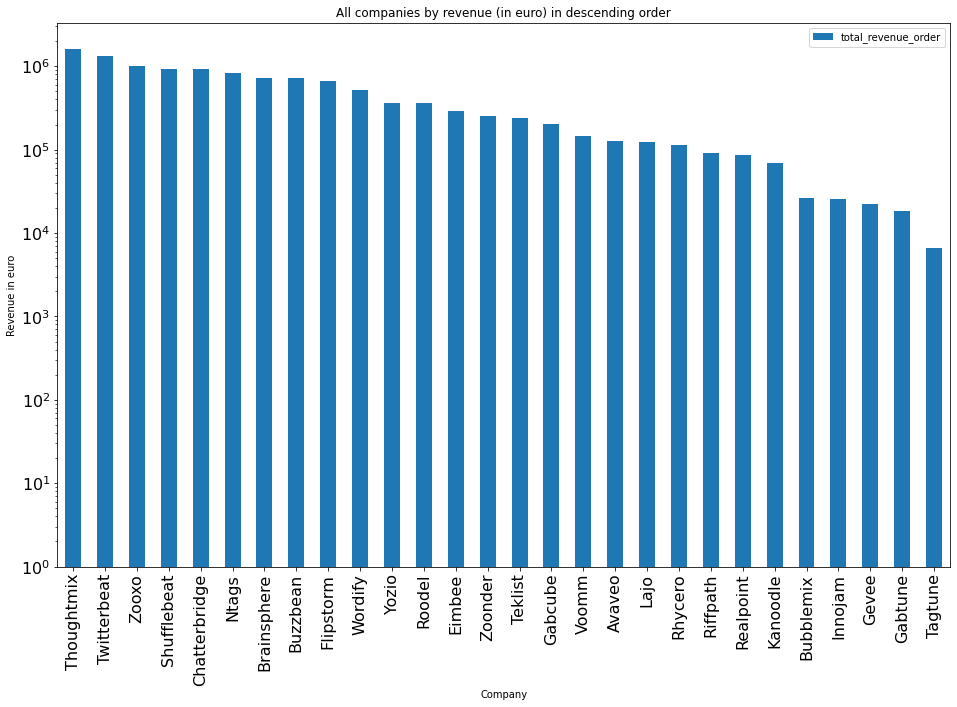

In [68]:
# your code goes here
import matplotlib.pyplot as plt

to_plot_q_1=psql.sqldf("""
SELECT company, 
       sum(prices_euro) as total_revenue_order 
  FROM df_transactions_clean 
  GROUP BY company
  ORDER BY total_revenue_order DESC
""")
to_plot_q_1.set_index('company').plot.bar(figsize=(16, 10), log=True,fontsize=16)
plt.title('All companies by revenue (in euro) in descending order')
plt.xlabel('Company')
plt.ylabel('Revenue in euro')

plt.show()

### Country by revenue, per year

The revenue of a country in a time period, is its total value of orders in that time period. Compute and visualise all countries by revenue, for years 2016, 2017 and 2018. Your visualisation should have countries on the x-axis and multiple bars (one for each year).

In [56]:
# df_transactions_clean[(df_transactions_clean['country']=='Canada')&(df_transactions_clean['date'].dt.year==2018)]

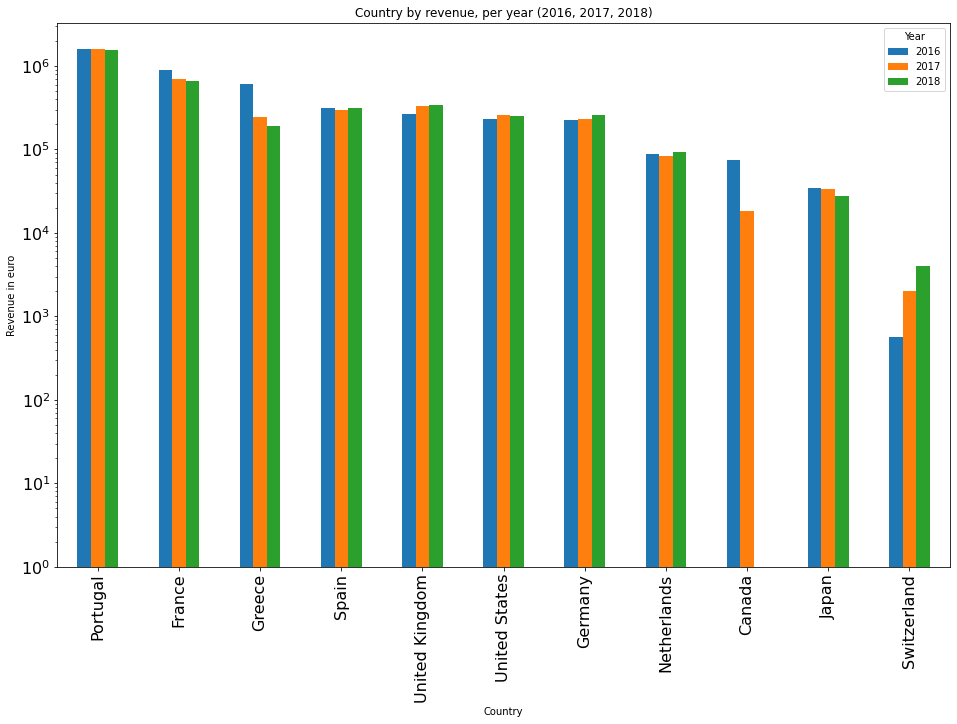

In [67]:
to_plot_q_2=psql.sqldf("""
SELECT country,
       strftime('%Y', date) AS Year,
       sum(prices_euro) as revenu
  FROM df_transactions_clean 
  WHERE  strftime('%Y', date) <="2018"
  GROUP BY 1,2
  ORDER BY revenu
""")

ax = to_plot_q_2.pivot_table(index='country', columns='Year', values='revenu').sort_values(by=['2016','2017','2018'],ascending=False) \
            .plot.bar(title='Country by revenue, per year (2016, 2017, 2018)', figsize=(16, 10),log=True,fontsize=16)
plt.xlabel('Country')
plt.ylabel('Revenue in euro')

plt.show()

### Orders per quarter, all companies

Compute and visualise the number of orders each company has placed in each quarter. Exclude quarters where the order count is less than 3. As always, be mindful to not produce a cluttered visualisation.

Part of your query should form a variable that converts `date` into `YEAR_QUARTER` format. Dealing with dates is via `STRFTIME` [docs](https://www.sqlite.org/lang_datefunc.html) which doesn't allow quarter extraction. Instead, it allows for extraction of month, which you can case on in order to produce the quarter (Q1, Q2, Q3, Q4).  

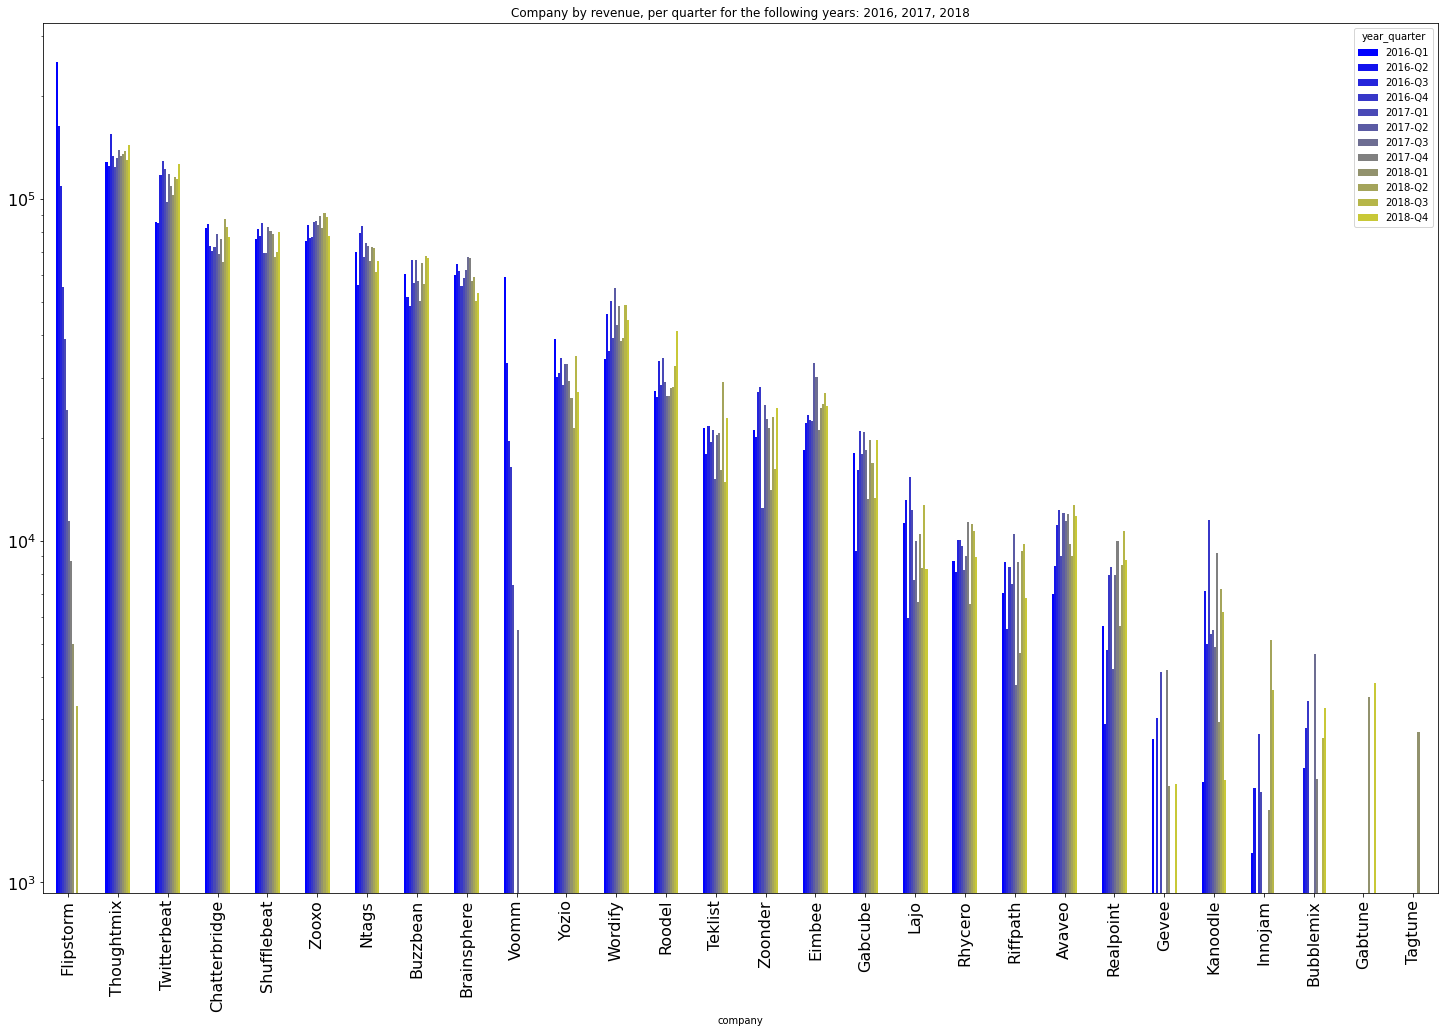

In [66]:
# your code goes here
import igraph

to_plot_q_3=psql.sqldf("""
SELECT company,
       strftime('%Y', date) ||'-' || case when cast(strftime('%m', date) as int)<4 then "Q1" 
            when cast(strftime('%m', date) as int)<7 then "Q2" 
            when cast(strftime('%m', date) as int)<10 then "Q3" 
            else "Q4" end as year_quarter,
       sum(prices_euro) as revenu,
       count(prices_euro) as nb_order
  FROM df_transactions_clean 
  WHERE  strftime('%Y', date) <="2018"
  Group by company,year_quarter
  Having nb_order>3
""")
# ['2016-Q1', '2016-Q4', '2017-Q1', '2017-Q4', '2018-Q1', '2018-Q4']
# to_plot_q_3
sorted_columns=list(to_plot_q_3.pivot_table(index='company', columns='year_quarter', values='revenu').columns)

n=len(to_plot_q_3.pivot_table(index='company', columns='year_quarter', values='revenu'))

my_colors = list(igraph.drawing.colors.AdvancedGradientPalette(["blue", "yellow",'white'],[0,n/2,n], n=n))

# plt.figure(figsize=(15,15))

# to_plot_q_3.pivot_table(index='company', columns='year_quarter', values='revenu')
ax = to_plot_q_3.pivot_table(index='company', columns='year_quarter', values='revenu')\
.sort_values(by=sorted_columns,ascending=False) \
            .plot.bar(title='Company by revenue, per quarter for the following years: 2016, 2017, 2018', figsize=(25, 16),log=True,color=my_colors,fontsize=16)


## Part 4: Parts and prices (20 pts)

### Parts demand changes

A different amount of orders are placed on parts each year. The demand of a part is the number of orders placed on it. The demand change of a part is the absolute difference between its average demand in 2016/2017, and its demand in 2018.

Compute and visualise the 15 parts whose demand change has been the largest.

In [72]:
# your code goes here
to_plot_q_4=psql.sqldf("""
WITH main_table as (SELECT * FROM (
    SELECT part,
           count(CASE WHEN strftime('%Y', date)='2016' then 1 end) as year_16,
           count(CASE WHEN strftime('%Y', date)='2017' then 1 end) as year_17,
           count(CASE WHEN strftime('%Y', date)='2018' then 1 end) as year_18
    FROM df_transactions_clean 
      WHERE  strftime('%Y', date) <="2018"
      Group by part) t)

SELECT part,
    year_16 as demand_16,
    year_17 as demand_17,
    year_18 as demand_18,
    (year_16+year_17)/2 as avg_demand_16_17,
    ABS(year_18- (year_16+year_17)/2) as demand_change
    FROM main_table
    order by demand_change DESC
    LIMIT 15
""")
to_plot_q_4

,part,demand_16,demand_17,demand_18,avg_demand_16_17,demand_change
0,10237-0832,100,112,73,106,33
1,62011-0219,115,98,78,106,28
2,65044-3014,110,76,66,93,27
3,00603-6134,101,80,64,90,26
4,68462-0565,106,95,74,100,26
5,68084-0172,109,97,78,103,25
6,51346-0145,103,104,80,103,23
7,00268-6107,118,91,84,104,20
8,21695-0267,69,70,49,69,20
9,35356-0325,81,85,63,83,20


In [73]:
to_plot_q_4.columns

Index(['part', 'demand_16', 'demand_17', 'demand_18', 'avg_demand_16_17',
       'demand_change'],
      dtype='object')

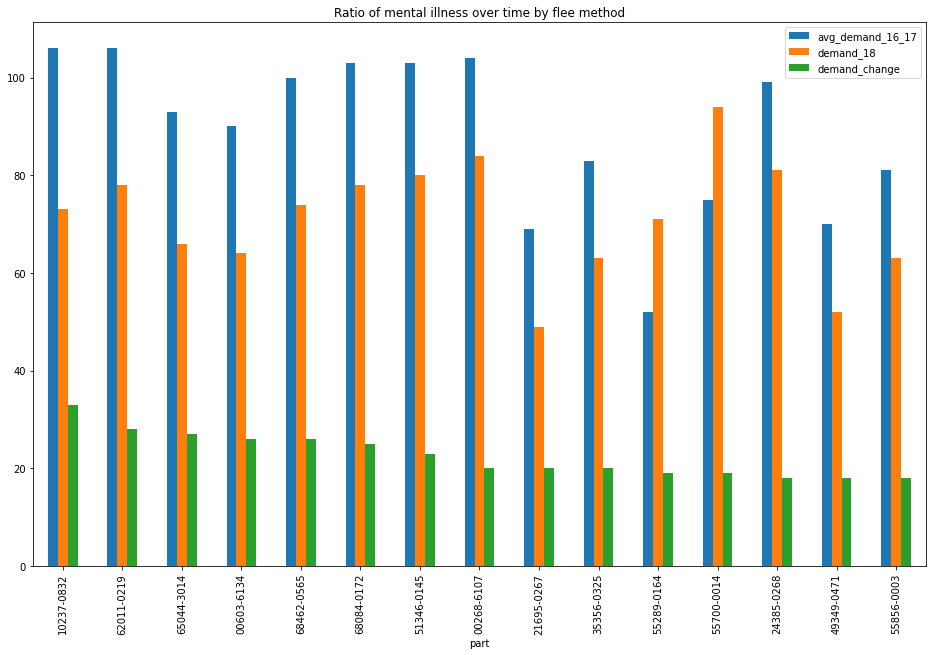

In [77]:
to_plot_q_4[['part','avg_demand_16_17','demand_18','demand_change']].set_index('part').\
            plot.bar(title='Ratio of mental illness over time by flee method', figsize=(16, 10))
plt.show()

### Popular parts pricing

The most popular parts are those whose demand has increased the most from its 2016/2017 average to 2018. We're interested to find out if popularity is due to a price drop, and also inform us if prices of these parts are properly adjusted.

The demand increase of a part is its 2018 demand minus its 2016/2017 average demand. The price change of a part is its average 2018 price minus its average 2016/2017 price.

Compute the parts whose demand has increased (has positive demand increase) and the change in price for each of these parts. Then visualise this relationship and include in the figure title the correlation (compute via pandas) between these two variables. Conclude which is most likely 1) Parts became more popular from a drop in prices, or 2) The sales department deserved its bonuses.

In [103]:
df_transactions_clean

,part,company,country,city,price,date,currency,value_price,currency_rate_vs_euro,prices_euro
0,54868-5165,Chatterbridge,Spain,Barcelona,784.79€,2016-01-02 00:01:05,€,784.79,1.0,784.79
1,60505-2867,Lajo,Greece,Thessaloniki,187.99€,2016-01-02 00:05:26,€,187.99,1.0,187.99
2,24385-0268,Flipstorm,Greece,Athens,221.73€,2016-01-02 00:18:30,€,221.73,1.0,221.73
3,76117-0001,Twitterbeat,France,Annecy,1075.82€,2016-01-02 02:32:30,€,1075.82,1.0,1075.82
4,44946-1046,Chatterbridge,Spain,Barcelona,412.55€,2016-01-02 04:51:55,€,412.55,1.0,412.55
...,...,...,...,...,...,...,...,...,...,...
20563,21695-0267,Roodel,Portugal,Aranhas,606.37€,2018-12-31 20:48:14,€,606.37,1.0,606.37
20564,49999-0737,Thoughtmix,Portugal,Amadora\t,828.37€,2018-12-31 21:24:17,€,828.37,1.0,828.37
20565,52343-0025,Brainsphere,Portugal,Braga,686.1€,2018-12-31 21:38:02,€,686.10,1.0,686.10
20566,49288-0285,Flipstorm,Greece,Athens,1051.08€,2019-02-21 20:05:00,€,1051.08,1.0,1051.08


In [111]:
test = df_transactions_clean.copy()
test['year']=test['date'].dt.year
test[['part','prices_euro','year']].to_csv('test.csv',index=False)

In [104]:
# your code goes here
to_plot_q_5=psql.sqldf("""
WITH main_table as (SELECT * FROM (
    SELECT part,
           count(CASE WHEN strftime('%Y', date)='2016' then 1 end) as year_16,
           count(CASE WHEN strftime('%Y', date)='2017' then 1 end) as year_17,
           count(CASE WHEN strftime('%Y', date)='2018' then 1 end) as year_18,
            
           SUM(CASE WHEN (strftime('%Y', date)='2016') or (strftime('%Y', date)='2017') then prices_euro else 0 end) as sum_price_year_16_17,
           SUM(CASE WHEN strftime('%Y', date)='2018' then prices_euro else 0 end) as sum_price_year_18
    FROM df_transactions_clean 
      WHERE  strftime('%Y', date) <="2018"
      Group by part) t)

SELECT part,
    (year_16+year_17)/2 as avg_demand_16_17,
    year_18 as demand_18,
    year_18- (year_16+year_17)/2 as increase_demand_change,
    sum_price_year_16_17/(year_16+year_17) as avg_price_year_16_17,
    sum_price_year_18/(year_18) as avg_price_year_18,
    sum_price_year_16_17/(year_16+year_17)-sum_price_year_18/(year_18) as drop_in_price
    FROM main_table
    order by increase_demand_change DESC
""")
to_plot_q_5

,part,avg_demand_16_17,demand_18,increase_demand_change,avg_price_year_16_17,avg_price_year_18,drop_in_price
0,55289-0164,52,71,19,414.823963,387.141699,27.682264
1,55700-0014,75,94,19,656.509713,665.058100,-8.548387
2,54868-6311,46,62,16,460.375686,438.262994,22.112692
3,21695-0931,59,71,12,506.367590,484.953810,21.413779
4,00699-7041,85,95,10,767.814234,705.538097,62.276137
...,...,...,...,...,...,...,...
95,00603-6134,90,64,-26,795.766415,796.893672,-1.127257
96,68462-0565,100,74,-26,906.016890,889.041838,16.975053
97,65044-3014,93,66,-27,798.261142,815.175792,-16.914651
98,62011-0219,106,78,-28,823.232900,829.792027,-6.559127


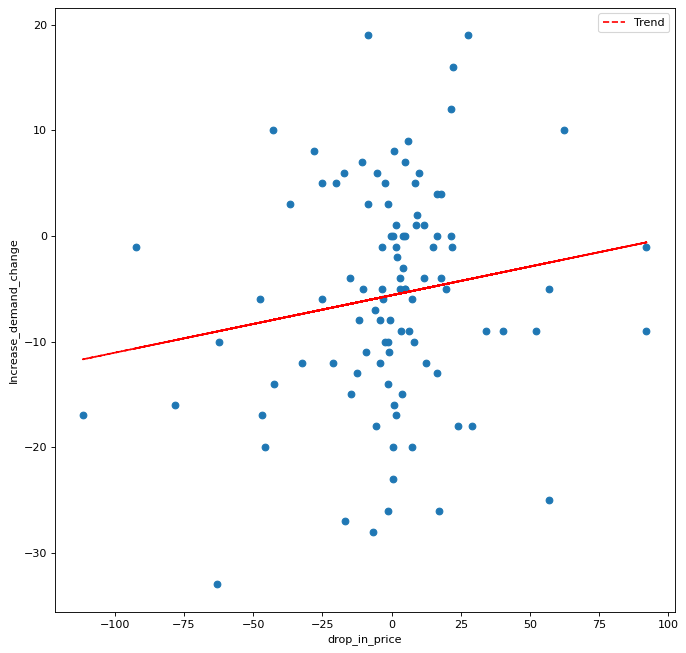

In [112]:
import numpy as np 

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(to_plot_q_5.drop_in_price,to_plot_q_5.increase_demand_change)
z = np.polyfit( to_plot_q_5.drop_in_price,to_plot_q_5.increase_demand_change, 1)
p = np.poly1d(z)
plt.plot(to_plot_q_5.drop_in_price,p(to_plot_q_5.drop_in_price),"r--",label='Trend')

plt.xlabel('drop_in_price')
plt.ylabel('Increase_demand_change')
plt.legend()
plt.show()

In [107]:
print('Equation: Increase_demand_change = {}+{}*drop_in_price'.format(round(p[0],1),round(p[1],2)))

Equation: Increase_demand_change = -5.6+0.05*drop_in_price


*your explanation goes here*